<a href="https://colab.research.google.com/github/deethereal/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys, numpy as np
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [7]:
from skimage.io import imread,imshow


**Cтохастический градиентный спуск**

In [3]:

images, labels=(x_train[0:1000].reshape(1000,28*28)/255,y_train[0:1000])
#one_hot_labels=np.eye((len(labels),10))
one_hot_labels=np.zeros((len(labels),10))
for i,l in enumerate(labels):
  one_hot_labels[i][l]=1
labels=one_hot_labels


test_images=(x_test.reshape((len(x_test),28*28))/255)
test_labels= np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
  test_labels[i][l]=1

np.random.seed(1)
relu=lambda x: (x>=0)*x
relu2div=lambda x: (x>=0)

In [19]:

learning_rate, niter, hidden_size, pix_per_img, num_labels = (0.005,800,40,784,10)
W01=0.2*np.random.random((pix_per_img,hidden_size)) - 0.1
W12=0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(niter):
  error,correct_cnt=(0.0,0)
  #print(error)
  for i in range(len(images)):
    l0=images[i:i+1]
    l1=relu(np.dot(l0,W01))
    drop_out_mask=np.random.randint(2,size=l1.shape) #распределение бернули: выключеаем 50% нейронов
    l1*=drop_out_mask*2
    l2=np.dot(l1,W12)
    
    error += np.sum((labels[i:i+1]-l2)**2)
    correct_cnt+= int(np.argmax(l2)==np.argmax(labels[i:i+1]))

    delta_l2=labels[i:i+1]-l2
    delta_l1=delta_l2.dot(W12.T)*relu2div(l1)
    delta_l1*=drop_out_mask

    W12+=learning_rate*l1.T.dot(delta_l2)
    W01+=learning_rate*l0.T.dot(delta_l1)
  if (j%10==0 or j==niter-1):
    test_error=0
    test_correct_cnt=0
    for i in range(len(test_images)):
      l0=test_images[i:i+1]
      l1=relu(np.dot(l0,W01))
      l2=np.dot(l1,W12)
      test_error+=np.sum((test_labels[i:i+1]-l2)**2)
      test_correct_cnt+=int(np.argmax(test_labels[i:i+1])==np.argmax(l2))
    print('iter: {} test_err: {} test_acc: {} train_err: {} train_acc: {}'.format(j,test_error/float(len(test_images)),test_correct_cnt/float(len(test_images)),error/float(len(labels)),correct_cnt/float(len(labels))   ))    
    

iter: 0 test_err: 0.7335255762731687 test_acc: 0.5377 train_err: 0.8806479694339677 train_acc: 0.298
iter: 10 test_err: 0.50627689574604 test_acc: 0.7466 train_err: 0.5820118391393229 train_acc: 0.639
iter: 20 test_err: 0.4724878493873714 test_acc: 0.7947 train_err: 0.5198292106732185 train_acc: 0.718
iter: 30 test_err: 0.44505085258333177 test_acc: 0.7983 train_err: 0.5136516715542433 train_acc: 0.717
iter: 40 test_err: 0.4395323183116373 test_acc: 0.7956 train_err: 0.4756959775574082 train_acc: 0.752
iter: 50 test_err: 0.4281803333213069 test_acc: 0.8034 train_err: 0.4635081686821083 train_acc: 0.768
iter: 60 test_err: 0.4322263403317268 test_acc: 0.808 train_err: 0.4571799886571933 train_acc: 0.771
iter: 70 test_err: 0.42820031216571325 test_acc: 0.8126 train_err: 0.452498521992092 train_acc: 0.774
iter: 80 test_err: 0.43076025363588233 test_acc: 0.8108 train_err: 0.4614487002561062 train_acc: 0.775
iter: 90 test_err: 0.4224864233638758 test_acc: 0.8113 train_err: 0.4362946426590809

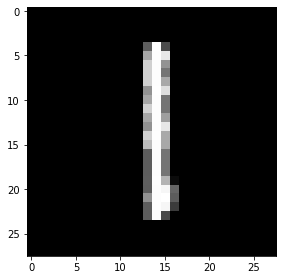

In [104]:
ix=np.random.randint(len(x_test))
imshow(x_test[ix])

In [105]:
inpt=x_test[ix].reshape(28*28)/255
pred=np.dot(relu(np.dot(inpt,W01)),W12)
print(np.argmax(pred))

1


**Пакетный градиентный спуск** 

In [20]:
batch_size=100
learning_rate, niter= (0.001,600)
hidden_size, pix_per_img, num_labels = (100,784,10)
W01=0.2*np.random.random((pix_per_img,hidden_size)) - 0.1
W12=0.2*np.random.random((hidden_size,num_labels)) - 0.1
for j in range(0,niter):
  error, correct_cnt=(0.0,0)
  for i in range(0,int(len(images)/batch_size)):
    batch_start, batch_end= i*batch_size, (i+1)*batch_size
    l0=images[batch_start:batch_end]
    l1=relu(np.dot(l0,W01))
    dropout_mask=np.random.randint(2,size=l1.shape)
    l1*=dropout_mask*2
    l2=np.dot(l1,W12)

    error+=np.sum((labels[batch_start:batch_end]-l2)**2)
    for k in range(batch_size):
      correct_cnt+=int(np.argmax(l2[k:k+1])==np.argmax(labels[batch_start+k:batch_end+k+1]))
    l2_delta=labels[batch_start:batch_end]-l2
    l1_delta=np.dot(l2_delta,W12.T)*relu2div(l1)
    l1_delta*=dropout_mask
    W12+=learning_rate*l1.T.dot(l2_delta)
    W01+=learning_rate*l0.T.dot(l1_delta)
  if (j%10==0 or j==niter-1):
    test_error=0
    test_correct_cnt=0
    for i in range(len(test_images)):
      l0=test_images[i:i+1]
      l1=relu(np.dot(l0,W01))
      l2=np.dot(l1,W12)
      test_error+=np.sum((test_labels[i:i+1]-l2)**2)
      test_correct_cnt+=int(np.argmax(test_labels[i:i+1])==np.argmax(l2))
    print('iter: {} test_err: {} test_acc: {} train_err: {} train_acc: {}'.format(j,test_error/float(len(test_images)),test_correct_cnt/float(len(test_images)),error/float(len(labels)),correct_cnt/(float(len(labels)))   ))   


iter: 0 test_err: 0.8016996697162401 test_acc: 0.4131 train_err: 1.2668723338407635 train_acc: 0.218
iter: 10 test_err: 0.5618209712531609 test_acc: 0.7211 train_err: 0.6082550063362213 train_acc: 0.687
iter: 20 test_err: 0.5059444298062556 test_acc: 0.7603 train_err: 0.5435232905743903 train_acc: 0.702
iter: 30 test_err: 0.4770136549046433 test_acc: 0.7814 train_err: 0.4906698466365071 train_acc: 0.77
iter: 40 test_err: 0.457236743639895 test_acc: 0.7915 train_err: 0.4873980994797779 train_acc: 0.758
iter: 50 test_err: 0.44698804957363847 test_acc: 0.7977 train_err: 0.46568168179792613 train_acc: 0.776
iter: 60 test_err: 0.4388809227260435 test_acc: 0.7995 train_err: 0.4554476004240638 train_acc: 0.788
iter: 70 test_err: 0.4413734366066844 test_acc: 0.8009 train_err: 0.4591177678470229 train_acc: 0.782
iter: 80 test_err: 0.43646558544038827 test_acc: 0.8037 train_err: 0.44690949604885116 train_acc: 0.793
iter: 90 test_err: 0.43516140562716527 test_acc: 0.8071 train_err: 0.434390240035

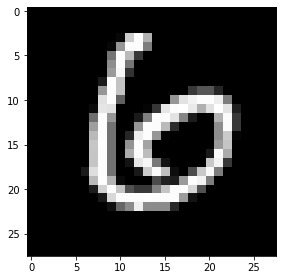

In [17]:
ix=np.random.randint(len(x_test))
imshow(x_test[ix])

In [18]:
inpt=x_test[ix].reshape(28*28)/255
pred=np.dot(relu(np.dot(inpt,W01)),W12)
print(np.argmax(pred))

6
